In [1]:
from KGS import *
import scipp as sc
from TubeMeasurment_mccode import BIFROST_measurement
from matplotlib.colors import LogNorm

# DATATREATMENT FOR POWDER - (long name)

In [2]:
#BIFROST_measurement.load_scan('BIFROST_open_DiwJaw_L02p9AA_v2', 'NACALF_open_L0_2p9AA_reduced', folder_path='../BIFROST_NACALF_sim/', set_Elim=(-1,3))

In [3]:
#BIFROST_measurement.load_scan('Powder_NAC_test_Ef5_1t','Powder_NAC_data_1t_5Ef_corrected',set_Elim=(-2,2), Correct=True)

# Open Divergence Jaws

In [4]:
powder =  np.loadtxt('NACALF_open_L0_2p9AA_reduced').T 

qx = sc.array(dims=["row"], values=powder[3], unit="Å^(-1)")
qy = sc.array(dims=["row"], values=powder[4], unit="Å^(-1)")
deltaE = sc.array(dims=["row"], values=powder[2], unit="meV")
Q = sc.array(dims=["row"], values=np.sqrt(powder[3]**2+powder[4]**2), unit="Å^(-1)")

recording = sc.DataArray(
    data=sc.array(dims=["row"], values=powder[0], unit="Å^(-1)", variances=powder[1]**2), 
    coords={"qx": qx, "qy": qy, "deltaE":deltaE, "Q":Q}
)

sliced = recording.bin(Q=400, qy=400, deltaE=300)
slicedQ = recording.bin(deltaE=220, Q=450)

sc.show(sliced)
sliced = sliced.bins.mean()
sliced

slicedQ = slicedQ.bins.mean()
slicedQ

<scipp.DataArray>
Dimensions: Sizes[deltaE:220, Q:450, ]
Coordinates:
* Q                         float64           [1/Å]  (Q [bin-edge])  [0.0882531, 0.0952801, ..., 3.24339, 3.25042]
* deltaE                    float64            [meV]  (deltaE [bin-edge])  [-0.999851, -0.98167, ..., 2.98176, 2.99994]
Data:
                            float64           [1/Å]  (deltaE, Q)  [nan, nan, ..., 0, 0]  [nan, nan, ..., 0, 0]

In [5]:
# Lets fit!
Q_min_picture = 0 * sc.Unit('Å^(-1)')
Q_max_picture = 3.0 * sc.Unit('Å^(-1)')

E_min_picture = -0.2 * sc.Unit('meV')
E_max_picture = 0.2 * sc.Unit('meV')

E_min_sum = -0.15 * sc.Unit('meV')
E_max_sum = 0.15 * sc.Unit('meV')

Q_min_sum = 0.3 * sc.Unit('Å^(-1)')
Q_max_sum = 2.8 * sc.Unit('Å^(-1)')

p_picture = slicedQ['Q',Q_min_picture:Q_max_picture]['deltaE', E_min_picture:E_max_picture]

p1_0p2 = slicedQ['Q',Q_min_sum:Q_max_sum]['deltaE', E_min_sum:E_max_sum]
p7 = sc.sum(p1_0p2, dim='deltaE')

# Gauss fit for line
Q = p7.coords['Q'].values
Q  = (Q[:-1] + Q[1:]) / 2.0

IQ_err = np.where(np.sqrt(p7.variances)==0, 0.2, np.sqrt(p7.variances))

I = np.where(p7.values == 0, 1, p7.values)

print(p7.variances)

peak_1 = p7.values[(Q > 0.75) & (Q<0.95)]
peak_2 = p7.values[(Q > 1.1) & (Q<1.35)]
peak_3 = p7.values[(Q > 1.4) & (Q<1.6)]
peak_4 = p7.values[(Q > 1.65) & (Q<1.8)]
peak_5 = p7.values[(Q > 1.85) & (Q<2.0)]
peak_6 = p7.values[(Q > 2.05) & (Q<2.2)]
peak_7 = p7.values[(Q > 2.2) & (Q<2.4)]
peak_8 = p7.values[(Q > 2.4) & (Q<2.5)]
peak_9 = p7.values[(Q > 2.5) & (Q<2.7)]
peak_10 = p7.values[(Q > 2.7) & (Q<2.8)]

Q_1 = Q[(Q > 0.75) & (Q<0.95)]
Q_2 = Q[(Q > 1.1) & (Q<1.35)]
Q_3 = Q[(Q > 1.4) & (Q<1.6)]
Q_4 = Q[(Q > 1.65) & (Q<1.8)]
Q_5 = Q[(Q > 1.85) & (Q<2.0)]
Q_6 = Q[(Q > 2.05) & (Q<2.2)]
Q_7 = Q[(Q > 2.2) & (Q<2.4)]
Q_8 = Q[(Q > 2.4) & (Q<2.5)]
Q_9 = Q[(Q > 2.5) & (Q<2.7)]
Q_10 = Q[(Q > 2.7) & (Q<2.8)]

guess_pow = {'A1': 4, 'mu1':0.85, 'sigma1': 0.015,
             'A2': 11, 'mu2':1.225, 'sigma2': 0.0165,
             'A3': 18, 'mu3':1.5, 'sigma3': 0.015,
             'A4': 30, 'mu4':1.73, 'sigma4': 0.015,
             'A5': 8, 'mu5':1.92, 'sigma5': 0.015,
             'A6': 11, 'mu6':2.15, 'sigma6': 0.015,
             'A7': 17, 'mu7':2.3, 'sigma7': 0.015,
             'A8': 18, 'mu8':2.45, 'sigma8': 0.015,
             'A9': 40, 'mu9':2.6, 'sigma9': 0.015,
             'A10': 42, 'mu10':2.75, 'sigma10': 0.015}

lim_pow = {'mu1':(0.75,0.95), 'sigma1':(0.002,0.03),
            'A2': (10.5,12), 'mu2':(1.15,1.35),'sigma2':(0.015,0.025),
            'mu3':(1.4,1.6),'sigma3':(0.002,0.03),
            'mu4':(1.7,1.75),'sigma4':(0.002,0.03),
            'mu5':(1.85,2.0),'sigma5':(0.002,0.03),
            'mu6':(2.05,2.2),'sigma6':(0.002,0.03),
            'mu7':(2.21,2.34),'sigma7':(0.002,0.03),
            'mu8':(2.35,2.5),'sigma8':(0.002,0.03),
            'mu9':(2.51,2.7),'sigma9':(0.002,0.03),
            'mu10':(2.7,2.8),'sigma10':(0.002,0.03)}

pow_fit = fit(Q, I, IQ_err, gaussN, guess_pow, limits=lim_pow)

pow_fit.hesse()

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.709e+04                  │             Nfcn = 6331              │
│ EDM = 962 (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1      │  0.0018   │  0.0017   │            │            │         │         │       │
│ 1 │ mu1     │  0.8509   │  0.0033   │            │            │  0.75   │  0.95   │       │
│ 2 │ sigma1  │  0.0143   │  0.0014   │            │            │  0.002  │  0.03   │       │
│ 3 │ A2      │  12.000   │   0.008   │            │            │  10.5   │   12    │       │
│ 4 │ mu2     │  1.22248  │  0.00024  │            │            │  1.15   │  1.35   │       │
│ 5 │ sigma2  │ 15.39e-3  │  0.09e-3  │            │            │  0.015  │  0.025  │       │
│ 6 │ A3      │   29.2    │    0.5    │            │            │         │         │       │
│ 7 │ mu3     │  1.50086  │  0.00017  │            │            │   1.4   │   1.6   │       │
│ 8 │ sigma3  │ 11.82e-3  │  0.05e-3  │            │            │  0.002  │  0.03   │       │
│ 9 │ A4      │   0.006   │   0.008   │            │            │         │         │       │
│ 10│ mu4     │   1.728   │   0.004   │            │            │   1.7   │  1.75   │       │
│ 11│ sigma4  │  14.4e-3  │  0.9e-3   │            │            │  0.002  │  0.03   │       │
│ 12│ A5      │   9.85    │   0.15    │            │            │         │         │       │
│ 13│ mu5     │  1.93407  │  0.00016  │            │            │  1.85   │    2    │       │
│ 14│ sigma5  │ 10.192e-3 │ 0.035e-3  │            │            │  0.002  │  0.03   │       │
│ 15│ A6      │   16.54   │   0.31    │            │            │         │         │       │
│ 16│ mu6     │  2.12374  │  0.00017  │            │            │  2.05   │   2.2   │       │
│ 17│ sigma6  │ 8.585e-3  │ 0.033e-3  │            │            │  0.002  │  0.03   │       │
│ 18│ A7      │   0.006   │   0.009   │            │            │         │         │       │
│ 19│ mu7     │  2.3023   │  0.0031   │            │            │  2.21   │  2.34   │       │
│ 20│ sigma7  │  14.3e-3  │  0.9e-3   │            │            │  0.002  │  0.03   │       │
│ 21│ A8      │    0.1    │    0.4    │            │            │         │         │       │
│ 22│ mu8     │   2.453   │   0.006   │            │            │  2.35   │   2.5   │       │
│ 23│ sigma8  │  0.0134   │  0.0021   │            │            │  0.002  │  0.03   │       │
│ 24│ A9      │   0.005   │   0.009   │            │            │         │         │       │
│ 25│ mu9     │   2.597   │   0.006   │            │            │  2.51   │   2.7   │       │
│ 26│ sigma9  │  0.0132   │  0.0022   │            │            │  0.002  │  0.03   │       │
│ 27│ A10     │   72.1    │    1.2    │            │            │         │         │       │
│ 28│ mu10    │  2.73933  │  0.00013  │            │            │   2.7   │   2.8   │       │
│ 29│ sigma10 │  9.49e-3  │  0.07e-3  │            │            │  0.002  │  0.0

In [6]:

def superGauss(x,A, mu, w, P):
    return A*np.exp(-0.6931 * (4*(x-mu)** 2 /w)**P)

mask = (Q > 1.1) & (Q<1.35)

sgaussguess = {'A': 10, 'mu':1.225, 'w': 0.015, 'P':2}
sgausslimit = {'A': (8,12), 'w': (0.0005,0.03), 'mu':(1.2,1.25), 'P':(1.97,2.05)}


s_fit = fit(Q[mask], p7.values[mask], IQ_err[mask], superGauss, sgaussguess, sgausslimit)
s_fit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 107.8                      │              Nfcn = 437              │
│ EDM = 1.25e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │  12.000   │   0.028   │            │            │    8    │   12    │       │
│ 1 │ mu   │  1.22428  │  0.00024  │            │            │   1.2   │  1.25   │       │
│ 2 │ w    │  2.69e-3  │  0.04e-3  │            │            │ 0.0005  │  0.03   │       │
│ 3 │ P    │   1.97    │   0.05    │            │            │  1.97   │  2.05   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │         A        mu         w         P │
├────┼─────────────────────────────────────────┤
│  A │  1.75e-09 -3.42e-14 -2.73e-13  -8.2e-16 │
│ mu │ -3.42e-14  5.68e-08 -3.03e-10  2.66e-12 │
│  w │ -2.73e-13 -3.03e-10   1.7e-09  8.09e-12 │
│  P │  -8.2e-16  2.66e-12  8.09e-12  1.64e-08 │
└────┴─────────────────────────────────────────┘

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


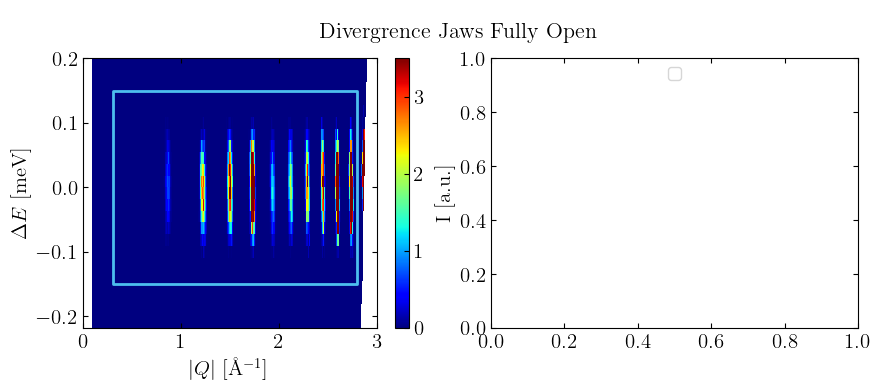

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

im = ax[0].pcolormesh(p_picture.coords['Q'].values, p_picture.coords['deltaE'].values, p_picture.values, cmap='jet', vmin=0, vmax=3.5)
cbar = plt.colorbar(im)
#cbar.set_label('I [a.u.]')
ax[0].set_xlabel('$|Q|$ [Å$^{-1}$]')
ax[0].set_ylabel('$\Delta E$ [meV]')
# Plot the rectangle using fill_between
ax[0].fill_between([Q_min_sum.value, Q_max_sum.value], E_min_sum.value, E_max_sum.value, color='none', edgecolor='#4dbeee', lw=2)
ax[0].set_xticks([0,1,2,3])
ax[0].text(0.1, 0.25, r'a)', weight='bold', color='white', fontsize=16)


q_range = np.linspace(min(Q), max(Q), 10000)

mask = (Q > 0.5) & (Q<2.8)
mask_q = (q_range > 1.4) & (q_range <1.6)


#ax[1].errorbar(Q[mask], p7.values[mask], IQ_err[mask], fmt='.', label='Simulation', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
#ax[1].plot(q_range, superGauss(q_range, *s_fit.values), '-', label='Super gauss Fit', color="#ee4dce")
#ax[1].plot(q_range, gaussN(q_range, *pow_fit.values), '-', label='GaussFit', color='#4dbeee')
#ax[1].plot(q_range, gaussN(q_range, 11, 1.22463, 0.0165), '-', label='Manual Gauss Fit', color="#ee9816")
ax[1].set_ylabel('I [a.u.]')
#ax[1].set_xlim(min(Q[mask]), max(Q[mask]))

ax[1].legend(loc='upper center',fontsize=12)
fig.suptitle('Divergrence Jaws Fully Open', fontsize=16)

#p7.plot(title='$Na_2Ca_3Al_2F_{14}$',  ax=ax[1])
# Adjust the space between the plots
plt.subplots_adjust(wspace=0.11)  # Reduce the space between the plots

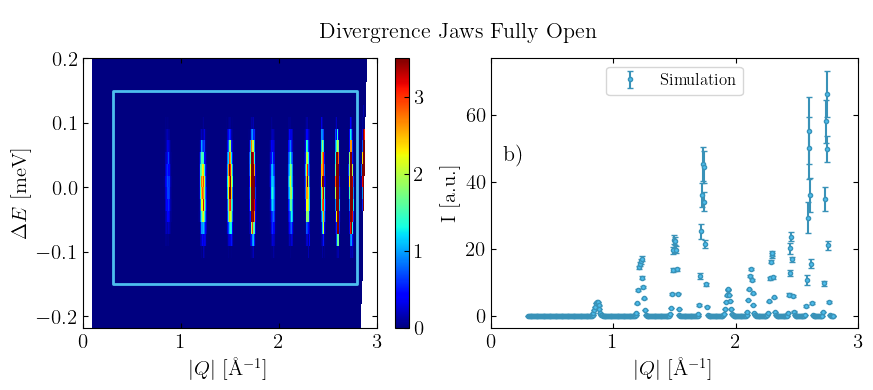

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

im = ax[0].pcolormesh(p_picture.coords['Q'].values, p_picture.coords['deltaE'].values, p_picture.values, cmap='jet', vmin=0, vmax=3.5)
cbar = plt.colorbar(im)
#cbar.set_label('I [a.u.]')
ax[0].set_xlabel('$|Q|$ [Å$^{-1}$]')
ax[0].set_ylabel('$\Delta E$ [meV]')
# Plot the rectangle using fill_between
ax[0].fill_between([Q_min_sum.value, Q_max_sum.value], E_min_sum.value, E_max_sum.value, color='none', edgecolor='#4dbeee', lw=2)
ax[0].set_xticks([0,1,2,3])
ax[0].text(0.1, 0.25, r'a)', weight='bold', color='white', fontsize=16)

q_range = np.linspace(min(Q), max(Q), 10000)
ax[1].errorbar(Q, p7.values, p7.variances, fmt='.', label='Simulation', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
#ax[1].plot(q_range, gaussN(q_range, *pow_fit.values), '-', label='Fit', color='#4dbeee')
ax[1].set_xlabel('$|Q|$ [Å$^{-1}$]')
ax[1].set_ylabel('I [a.u.]')
ax[1].set_xticks([0,1,2,3])
ax[1].text(0.1, 46, r'b)', fontsize=16)
ax[1].legend(loc='upper center',fontsize=12)
#ax[1].set_xlim(1.6,2.1)
fig.suptitle('Divergrence Jaws Fully Open', fontsize=16)

#p7.plot(title='$Na_2Ca_3Al_2F_{14}$',  ax=ax[1])
# Adjust the space between the plots
plt.subplots_adjust(wspace=0.11)  # Reduce the space between the plots

#plt.savefig('../../Figures/PNG/NACALF_DiwJaw_Open.png', format='png',dpi=200, bbox_inches='tight')
#plt.savefig('../../Figures/SVG/NACALF_DiwJaw_Open.svg', format='svg',dpi=200, bbox_inches='tight')

# 0.2 degree Divergence Jaws

In [9]:
powder1 =  np.loadtxt('NACALF_0p2_L0_2p9AA_reduced').T # NACALF_0p2_reduced

qx1 = sc.array(dims=["row"], values=powder1[3], unit="Å^(-1)")
qy1 = sc.array(dims=["row"], values=powder1[4], unit="Å^(-1)")
deltaE1 = sc.array(dims=["row"], values=powder1[2], unit="meV")
Q1 = sc.array(dims=["row"], values=np.sqrt(powder1[3]**2+powder1[4]**2), unit="Å^(-1)")

recording1 = sc.DataArray(
    data=sc.array(dims=["row"], values=powder1[0], unit="Å^(-1)", variances=powder1[1]**2), 
    coords={"qx": qx1, "qy": qy1, "deltaE":deltaE1, "Q":Q1}
)

sliced1 = recording1.bin(qx=400, qy=400, deltaE=300)
slicedQ1 = recording1.bin(deltaE=250, Q=600)

slicedQ1 = slicedQ1.bins.mean()
slicedQ1
sc.show(sliced1)

In [10]:
# Lets fit!

p_0p2 = slicedQ1['Q',Q_min_picture:Q_max_picture]['deltaE', E_min_picture:E_max_picture]

p1_0p2 = slicedQ1['Q',Q_min_sum:Q_max_sum]['deltaE', E_min_sum:E_max_sum]
psum_0p2 = sc.sum(p1_0p2, dim='deltaE')

Q_0p2 = psum_0p2.coords['Q'].values
Q_0p2  = (Q_0p2[:-1] + Q_0p2[1:]) / 2.0



peak_0p2_1 = psum_0p2.values[(Q_0p2 > 0.75) & (Q_0p2<0.95)]
peak_0p2_2 = psum_0p2.values[(Q_0p2 > 1.1) & (Q_0p2<1.35)]
peak_0p2_3 = psum_0p2.values[(Q_0p2 > 1.4) & (Q_0p2<1.6)]
peak_0p2_4 = psum_0p2.values[(Q_0p2 > 1.65) & (Q_0p2<1.8)]
peak_0p2_5 = psum_0p2.values[(Q_0p2 > 1.85) & (Q_0p2<2.0)]
peak_0p2_6 = psum_0p2.values[(Q_0p2 > 2.05) & (Q_0p2<2.2)]
peak_0p2_7 = psum_0p2.values[(Q_0p2 > 2.2) & (Q_0p2<2.4)]
peak_0p2_8 = psum_0p2.values[(Q_0p2 > 2.4) & (Q_0p2<2.5)]
peak_0p2_9 = psum_0p2.values[(Q_0p2 > 2.5) & (Q_0p2<2.7)]
peak_0p2_10 = psum_0p2.values[(Q_0p2 > 2.7) & (Q_0p2<2.8)]

Q_0p2_1 = Q_0p2[(Q_0p2 > 0.75) & (Q_0p2<0.95)]
Q_0p2_2 = Q_0p2[(Q_0p2 > 1.1) & (Q_0p2<1.35)]
Q_0p2_3 = Q_0p2[(Q_0p2 > 1.4) & (Q_0p2<1.6)]
Q_0p2_4 = Q_0p2[(Q_0p2 > 1.65) & (Q_0p2<1.8)]
Q_0p2_5 = Q_0p2[(Q_0p2 > 1.85) & (Q_0p2<2.0)]
Q_0p2_6 = Q_0p2[(Q_0p2 > 2.05) & (Q_0p2<2.2)]
Q_0p2_7 = Q_0p2[(Q_0p2 > 2.2) & (Q_0p2<2.4)]
Q_0p2_8 = Q_0p2[(Q_0p2 > 2.4) & (Q_0p2<2.5)]
Q_0p2_9 = Q_0p2[(Q_0p2 > 2.5) & (Q_0p2<2.7)]
Q_0p2_10 = Q_0p2[(Q_0p2 > 2.7) & (Q_0p2<2.8)]


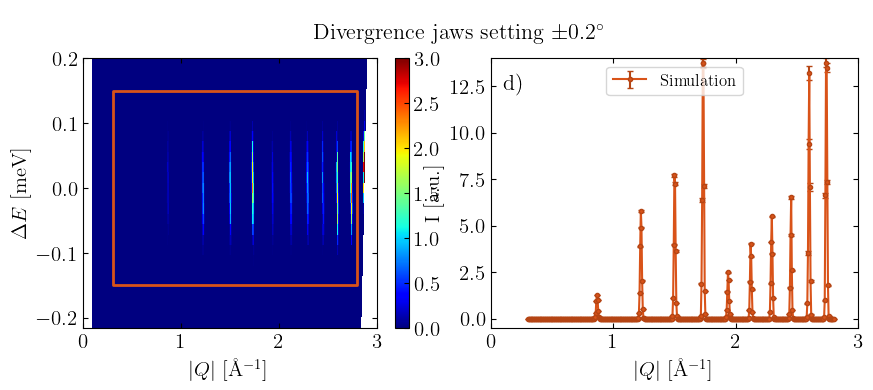

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

im = ax[0].pcolormesh(p_0p2.coords['Q'].values, p_0p2.coords['deltaE'].values, p_0p2.values, cmap='jet', vmin=0, vmax=3)
cbar = plt.colorbar(im)
#cbar.set_label('I [a.u.]')
ax[0].set_xlabel('$|Q|$ [Å$^{-1}$]')
ax[0].set_ylabel('$\Delta E$ [meV]')
# Plot the rectangle using fill_between
ax[0].fill_between([Q_min_sum.value, Q_max_sum.value], E_min_sum.value, E_max_sum.value, color='none', edgecolor='#d95319', lw=2)
ax[0].set_xticks([0,1,2,3])
ax[0].text(0.13, 0.25, r'c)', weight='bold', color='white', fontsize=16)

q_range = np.linspace(min(Q), max(Q), 10000)
ax[1].errorbar(Q_0p2, psum_0p2.values, psum_0p2.variances, fmt='.-', label='Simulation', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514')
#ax[1].plot(q_range, gaussN(q_range, *pow_fit_0p2.values), '-', label='Fit', color='#d95319')
ax[1].set_xlabel('$|Q|$ [Å$^{-1}$]')
ax[1].set_ylabel('I [a.u.]')
ax[1].set_xticks([0,1,2,3])
ax[1].set_ylim([-0.5,14])
ax[1].text(0.1, 12.3, r'd)', fontsize=16)
ax[1].legend(loc='upper center',fontsize=12)
fig.suptitle(r'Divergrence jaws setting $\pm 0.2^{\circ}$', fontsize=16)

# Adjust the space between the plots
plt.subplots_adjust(wspace=0.11)  # Reduce the space between the plots

plt.savefig('../../Figures/PNG/NACALF_DiwJaw_0p2deg.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/NACALF_DiwJaw_0p2deg.svg', format='svg',dpi=200, bbox_inches='tight')

# Overview of resolution 

In [12]:
def calc_mu(x,y):
    return np.average(x, weights=y)

def calc_FWHM(x,y):
    mu = np.average(x, weights=y)
    FWHM = np.sqrt(np.average((x-mu)**2, weights=y))*2.3548
    return FWHM

open_mu = np.array([calc_mu(Q_1,peak_1), calc_mu(Q_2,peak_2), calc_mu(Q_3,peak_3), calc_mu(Q_4,peak_4), calc_mu(Q_5,peak_5), calc_mu(Q_6,peak_6), calc_mu(Q_7,peak_7), calc_mu(Q_8,peak_8), calc_mu(Q_9,peak_9), calc_mu(Q_10,peak_10)])
open_FWHM = np.array([calc_FWHM(Q_1,peak_1), calc_FWHM(Q_2,peak_2), calc_FWHM(Q_3,peak_3), calc_FWHM(Q_4,peak_4), calc_FWHM(Q_5,peak_5), calc_FWHM(Q_6,peak_6), calc_FWHM(Q_7,peak_7), calc_FWHM(Q_8,peak_8), calc_FWHM(Q_9,peak_9), calc_FWHM(Q_10,peak_10)])
open_err = np.ones(10)*0.003

mu_0p2 = np.array([calc_mu(Q_0p2_1,peak_0p2_1), calc_mu(Q_0p2_2,peak_0p2_2), calc_mu(Q_0p2_3,peak_0p2_3), calc_mu(Q_0p2_4,peak_0p2_4), calc_mu(Q_0p2_5,peak_0p2_5), calc_mu(Q_0p2_6,peak_0p2_6), calc_mu(Q_0p2_7,peak_0p2_7), calc_mu(Q_0p2_8,peak_0p2_8), calc_mu(Q_0p2_9,peak_0p2_9), calc_mu(Q_0p2_10,peak_0p2_10)])
FWHM_0p2 = np.array([calc_FWHM(Q_0p2_1,peak_0p2_1), calc_FWHM(Q_0p2_2,peak_0p2_2), calc_FWHM(Q_0p2_3,peak_0p2_3), calc_FWHM(Q_0p2_4,peak_0p2_4), calc_FWHM(Q_0p2_5,peak_0p2_5), calc_FWHM(Q_0p2_6,peak_0p2_6), calc_FWHM(Q_0p2_7,peak_0p2_7), calc_FWHM(Q_0p2_8,peak_0p2_8), calc_FWHM(Q_0p2_9,peak_0p2_9), calc_FWHM(Q_0p2_10,peak_0p2_10)])
err_0p2 = np.ones(10)*0.003


print(open_FWHM)
print(FWHM_0p2)

geuss_open = {'a': 0.01,'b':0.1}
geuss_0p2 = {'a': 0.005,'b':0.1}

fit_open = fit(open_mu, open_FWHM, open_err, lin, geuss_open)
fit_0p2 = fit(mu_0p2, FWHM_0p2, err_0p2, lin, geuss_0p2)

fit_open.hesse()



[0.03497376 0.03651468 0.03368211 0.03188959 0.03184705 0.02863836
 0.02787077 0.02364754 0.02370416 0.02272933]
[0.01540448 0.01591866 0.01500632 0.01479522 0.01529994 0.01423101
 0.01463705 0.01253294 0.01421616 0.01417727]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.523                      │              Nfcn = 45               │
│ EDM = 7.07e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -0.0077  │  0.0016   │            │            │         │         │       │
│ 1 │ b    │  0.0446   │  0.0033   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  2.65e-06 -5.16e-06 │
│ b │ -5.16e-06  1.09e-05 │
└───┴─────────────────────┘

In [13]:
fit_0p2.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.4122                     │              Nfcn = 41               │
│ EDM = 1.39e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -0.0011  │  0.0016   │            │            │         │         │       │
│ 1 │ b    │  0.0168   │  0.0033   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  2.65e-06 -5.17e-06 │
│ b │ -5.17e-06   1.1e-05 │
└───┴─────────────────────┘

In [14]:
ana_res = np.loadtxt('Q_resolutions_vs_stts.txt', delimiter=" ").T

stt = ana_res[0]
Q_len = 4*np.pi/(E_to_lambda(5))*np.sin(np.radians(stt/2))
ana_FWHM_open = ana_res[3]
ana_FWHM_0p4 = ana_res[2]
ana_FWHM_0p2 = ana_res[1]

print(len(Q_len))
print(len(ana_FWHM_open))
print(len(ana_FWHM_0p2))
print(Q_len)

10000
10000
10000
[0.53946482 0.53977188 0.54007894 ... 2.8699354  2.87005477 2.87017411]


0.0329672
[0.03497376 0.03651468 0.03368211 0.03188959 0.03184705 0.02863836
 0.02787077 0.02364754 0.02370416 0.02272933]


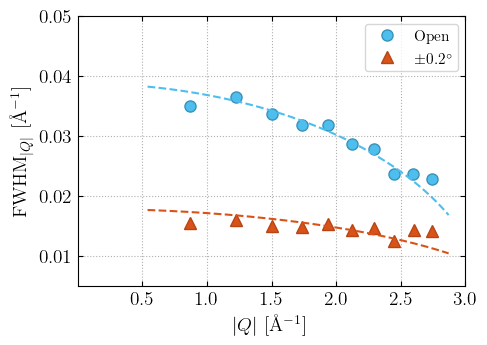

In [15]:
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['errorbar.capsize'] = 4
mpl.rcParams['font.size']        = 14

Q_range = np.linspace(0.2,2.9,1000)

plt.figure(figsize=(5, 3.5))
plt.plot(open_mu,open_FWHM, 'o', label='Open', color='#4dbeee', mew=1, markeredgecolor='#3992b8')


#plt.plot(Q_len, ana_FWHM_0p4,'--' ,color="#01bc20")

print(0.014*2.3548)
print(open_FWHM)

plt.plot(mu_0p2,FWHM_0p2, '^', label='$\pm 0.2^{\circ}$', color='#d95319', mew=1, markeredgecolor='#b54514')
plt.plot(Q_len, ana_FWHM_0p2, '--', color='#d95319')
plt.plot(Q_len, ana_FWHM_open,'--' ,color='#4dbeee')

plt.xlabel('$|Q|$ [Å$^{-1}$]')
plt.ylabel('FWHM$_{|Q|}$ [Å$^{-1}$]')
plt.xlim(0,3)
plt.ylim(0.005,0.05)
#plt.yticks([0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035])
plt.xticks([0.5,1,1.5,2,2.5,3])
plt.legend(fontsize=11)
plt.grid(linestyle='dotted')

plt.savefig('../../Figures/PNG/NACALF_Q_resolution.png', format='png',dpi=200, bbox_inches='tight')
plt.savefig('../../Figures/SVG/NACALF_Q_resolution.svg', format='svg',dpi=200, bbox_inches='tight')


## One Q figure to end them all

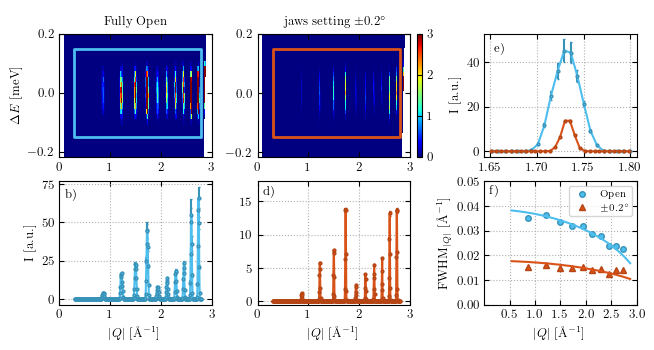

In [21]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams.update({
    "font.size": 9,
    "axes.titlesize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    'lines.markersize': 4,
})

def set_size_cm(width_cm, height_cm):
    return (width_cm / 2.54, height_cm / 2.54)


fig = plt.figure(figsize=set_size_cm(18, 9-0.07))
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1])
plt.subplots_adjust(wspace=0.3, hspace=0.2)


# First two columns, top row
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# First two columns, bottom row
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Third column spanning both rows
ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])
############################################################################
# Example: set titles (just placeholders)
ax1.set_title("Fully Open")
im = ax1.pcolormesh(p_picture.coords['Q'].values, p_picture.coords['deltaE'].values, p_picture.values, cmap='jet', vmin=0, vmax=3)
ax1.set_ylabel('$\Delta E$ [meV]')
ax1.fill_between([Q_min_sum.value, Q_max_sum.value], E_min_sum.value, E_max_sum.value, color='none', edgecolor='#4dbeee', lw=2)
ax1.set_xticks([0,1,2,3])
ax1.text(0.12, 0.25, r'\textbf{a)}', weight='bold', color='white')


ax2.set_title("jaws setting $\pm 0.2^{\circ}$")
im = ax2.pcolormesh(p_0p2.coords['Q'].values, p_0p2.coords['deltaE'].values, p_0p2.values, cmap='jet', vmin=0, vmax=3)
ax2.fill_between([Q_min_sum.value, Q_max_sum.value], E_min_sum.value, E_max_sum.value, color='none', edgecolor='#d95319', lw=2)
ax2.set_xticks([0,1,2,3])
ax2.text(0.13, 0.25, r'\textbf{c)}', weight='bold', color='white')

cax = fig.add_axes([0.63, 0.53, 0.007, 0.35])  # [x0, y0, width, height]
cbar = fig.colorbar(im, cax=cax)
#cbar.ax.set_ylabel("Intensity [a.u.]", rotation=0, labelpad=20)




q_range = np.linspace(min(Q), max(Q), 10000)
ax3.errorbar(Q, p7.values, p7.variances, fmt='.-', label='Simulation', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8', capsize=1)
#ax3.plot(q_range, gaussN(q_range, *pow_fit.values), '-', label='Fit', color='#4dbeee')
ax3.set_xlabel('$|Q|$ [Å$^{-1}$]')
ax3.set_ylabel('I [a.u.]')
ax3.set_xticks([0,1,2,3])
ax3.text(0.12, 66, r'b)')
ax3.grid(linestyle='dotted')



q_range = np.linspace(min(Q), max(Q), 10000)
ax4.errorbar(Q_0p2, psum_0p2.values, psum_0p2.variances, fmt='.-', label='Simulation', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514', capsize=1)
#ax4.plot(q_range, gaussN(q_range, *pow_fit_0p2.values), '-', label='Fit', color='#d95319')
ax4.set_xlabel('$|Q|$ [Å$^{-1}$]')
ax4.set_xticks([0,1,2,3])
ax4.set_ylim([-0.5,18])
ax4.text(0.1, 16, r'd)')
ax4.grid(linestyle='dotted')

mask = (Q > 1.65) & (Q < 1.8)
mask2 = (Q_0p2 > 1.65) & (Q_0p2 < 1.8)
mask3 = (q_range > 1.65) & (q_range < 1.8)

#print(max(Q[p7.values==30.076026177162383]))

pos = ax5.get_position()
ax5.set_position([pos.x0 + 0.04, pos.y0, pos.width, pos.height])
ax5.errorbar(Q[mask], p7.values[mask], p7.variances[mask], fmt='.-', label=r'Open', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8', capsize=1)


ax5.errorbar(Q_0p2[mask2], psum_0p2.values[mask2], psum_0p2.variances[mask2], fmt='.-', label=r'$\pm 0.2$', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514', capsize=1)
ax5.grid(linestyle='dotted')
ax5.text(1.654, 45, r'e)', weight='bold', color='black')
ax5.set_ylabel('I [a.u.]')


Q_range = np.linspace(0.3,2.9,1000)
pos = ax6.get_position()
ax6.set_position([pos.x0 + 0.04, pos.y0, pos.width, pos.height])
ax6.plot(open_mu,open_FWHM,'o', label='Open', color='#4dbeee', mew=1, markeredgecolor='#3992b8')
ax6.plot(Q_len, ana_FWHM_open,'-' ,color='#4dbeee')
#ax6.plot(Q_range, lin(Q_range, *fit_open.values),'--' ,color='#4dbeee')



ax6.plot(mu_0p2,FWHM_0p2,'^', label='$\pm 0.2^{\circ}$', color='#d95319', mew=1, markeredgecolor='#b54514')
ax6.plot(Q_len, ana_FWHM_0p2, '-', color='#d95319')
#ax6.plot(Q_range, lin(Q_range, *fit_0p2.values), '--', color='#d95319')

ax6.set_xlabel('$|Q|$ [Å$^{-1}$]')
ax6.set_ylabel('FWHM$_{|Q|}$ [Å$^{-1}$]')
ax6.set_xlim(0,3)
ax6.set_ylim(0.0,0.05)
ax6.set_xticks([0.5,1,1.5,2,2.5,3])
ax6.set_yticks([0.0, 0.01,0.02,0.03,0.04,0.05])
ax6.text(0.1, 0.045, r'f)', weight='bold', color='black')
ax6.legend(fontsize=7)
ax6.grid(linestyle='dotted')

plt.savefig('../../Figures/PNG/NACALF_Q_experiment.png', format='png',dpi=300, bbox_inches='tight')

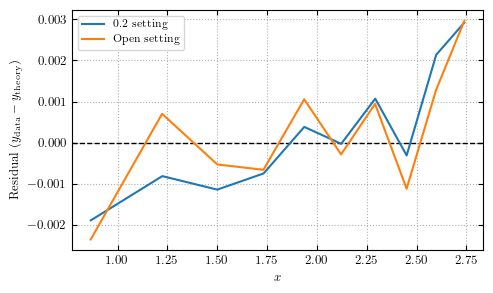

In [19]:

from scipy.interpolate import interp1d

# =========================
# Dataset 1 (0.2)
# =========================
x1 = mu_0p2
y1 = FWHM_0p2
x1_th = Q_len
y1_th = ana_FWHM_0p2

interp1 = interp1d(
    x1_th, y1_th,
    bounds_error=False,
    fill_value=np.nan
)

y1_th_i = interp1(x1)
res1 = y1 - y1_th_i


# =========================
# Dataset 2 (open)
# =========================
x2 = open_mu
y2 = open_FWHM
x2_th = Q_len
y2_th = ana_FWHM_open

interp2 = interp1d(
    x2_th, y2_th,
    bounds_error=False,
    fill_value=np.nan
)

y2_th_i = interp2(x2)
res2 = y2 - y2_th_i


# =========================
# Remove NaNs (outside theory range)
# =========================
m1 = ~np.isnan(res1)
m2 = ~np.isnan(res2)

# =========================
# Plot
# =========================
plt.figure(figsize=(5, 3))

plt.axhline(0, color='k', linestyle='--', linewidth=1)

plt.plot(x1[m1], res1[m1], '-', markersize=4, label='0.2 setting')
plt.plot(x2[m2], res2[m2], '-', markersize=4, label='Open setting')

plt.xlabel(r'$x$')
plt.ylabel(r'Residual ($y_\mathrm{data} - y_\mathrm{theory}$)')
plt.legend(fontsize=8)
plt.grid(linestyle='dotted')

plt.tight_layout()
plt.show()



In [ ]:
interp = interp1d(Q_len, ana_FWHM_0p2, bounds_error=False, fill_value=np.nan)
residuals = FWHM_0p2 - interp(mu_0p2)


In [ ]:
def generate_latex_table(FWHM_list, mu_list):
    lines = []

    # Header
    lines.append(r'\begin{table}')
    lines.append(r'\centering')
    lines.append(r'    \begin{tabular}{ p{1.4cm} |p{1.3cm}||p{2.5cm}|p{3cm}|p{3cm}||p{1.0cm}  }')
    lines.append(r'     \hline')
    lines.append(r'     \multicolumn{6}{c}{$Na_2Ca_3Al_2F_{14}$ powder peaks} \\')
    lines.append(r'     \hline')
    lines.append(r'     Peak\#, (h k l) & Q-input [Å$^{-1}$] & A [I] & $\mu$ [Å$^{-1}$] & $\sigma$ [Å$^{-1}$] & FWHM [Å$^{-1}$] \\')
    lines.append(r'     \hline')

    for i in range(1, 10):
        #A = max(list)
        mu = mu_list[i]
        FWHM = FWHM_list[i]

        #A_err = pow_fit.errors[f"A{i}"]
        #mu_err = pow_fit.errors[f"mu{i}"]
        #sigma_err = pow_fit.errors[f"sigma{i}"]

        #FWHM = sigma * 2.35

        line = (f" & "
                #f"{mu:.3f} $\pm$ {mu:.3f} & "
                f"{mu:.4f} & "
                f"{FWHM:.3f}\\\\")
        lines.append(line)

    lines.append(r'     \hline')
    lines.append(r'    \end{tabular}')
    lines.append(r'    \caption{}')
    lines.append(r'    \label{table: powder data}')
    lines.append(r'\end{table}')

    return '\n'.join(lines)

# Active divergence jaws settings. 
latex_code = generate_latex_table(FWHM_0p2, mu_0p2)
print(latex_code)

In [ ]:
# Fully open jaw settings. 
print(open_FWHM)

latex_code_open = generate_latex_table(open_FWHM, open_mu)
print(latex_code_open)